<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB
[ 8.87095614e-01  5.85513083e-01 -4.76088446e-01 -1.00579988e-08]
0.21562506548211502
Mean Absolute Error: 0.4691606825189661
Mean Squared Error: 0.9033937311084915
Root Mean Squared Error: 0.9504702683979608


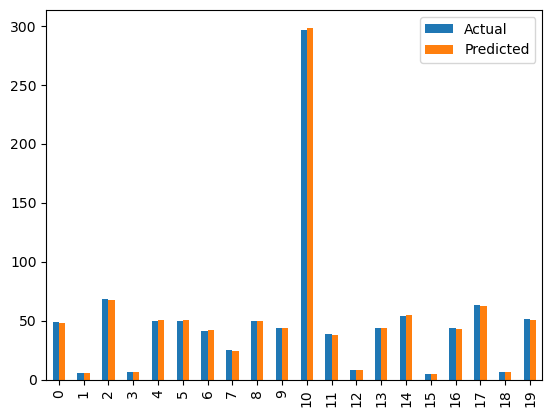

In [58]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import math

# reading data
data = pd.read_csv("TSLA.csv")
data.head()
data.info()
data.describe()
data.columns


X = data[['High','Low','Open','Volume']].values
y = data['Close'].values
X
y

# assigning training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
LgR = LinearRegression()
LgR.fit(X_train, y_train)
print(LgR.coef_)
print(LgR.intercept_)
predicted = LgR.predict(X_test)

# combining actual and predicted data
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data1.head(20)

#plotting graph
graph = data1.head(20)
graph.plot(kind='bar')

# mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))